<a href="https://colab.research.google.com/github/NahinAlam001/CSE-465/blob/master/PCOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import torch
from torch import nn

print(torch.__version__)

2.2.1+cu121


In [40]:
device = "cuda" if torch.cuda.is_available else "cpu"
print(device)

cuda


In [41]:
from math import e
from pathlib import Path

data_path = Path('data/')
image_path = data_path/'images'

if image_path.is_dir():
  print(f'{image_path} does not exist... Skipping Folder Creation')
else:
  print(f'{image_path} does exist... Creating Folder')
  image_path.mkdir(parents=True, exist_ok=True)

data/images does not exist... Skipping Folder Creation


In [42]:
import gdown

gdown.download('https://drive.google.com/uc?export=download&id=10tPq2ERw3NHQWLsia3hnBb1Yc54dJwS8', 'images.zip', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=10tPq2ERw3NHQWLsia3hnBb1Yc54dJwS8
From (redirected): https://drive.google.com/uc?export=download&id=10tPq2ERw3NHQWLsia3hnBb1Yc54dJwS8&confirm=t&uuid=41367ad9-94c5-4582-b7bd-d7418833eead
To: /content/images.zip
100%|██████████| 132M/132M [00:02<00:00, 60.6MB/s]


'images.zip'

In [43]:
import zipfile

with zipfile.ZipFile('images.zip', 'r') as zip_ref:
  zip_ref.extractall()

print(f'Extracted files')

Extracted files


In [44]:
# Define the destination directory
source_dirs = ['/content/data/test','/content/data/train']
destination_dir = '/content/data/images'

for directory in source_dirs:
  !mv {directory} {destination_dir}/

mv: cannot move '/content/data/test' to '/content/data/images/test': Directory not empty
mv: cannot move '/content/data/train' to '/content/data/images/train': Directory not empty


In [45]:
import os

def walk_through_dir(dir_path):
  '''Walks through directories and prints the number of pictures in them'''
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} pictures in {dirpath}')

walk_through_dir(image_path)

There are 2 directories and 0 pictures in data/images
There are 2 directories and 0 pictures in data/images/test
There are 0 directories and 787 pictures in data/images/test/infected
There are 0 directories and 1145 pictures in data/images/test/notinfected
There are 2 directories and 0 pictures in data/images/train
There are 0 directories and 781 pictures in data/images/train/infected
There are 0 directories and 1143 pictures in data/images/train/notinfected


In [46]:
image_path_list = list(image_path.glob('*/*/*.jpg'))
len(image_path_list)

3846

Class: infected | Size: (300, 300)


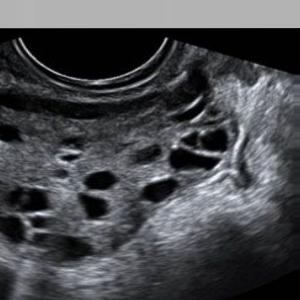

In [47]:
import random
from PIL import Image

random.seed(42)

random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

print(f'Class: {image_class} | Size: {img.size}')
img

(-0.5, 299.5, 299.5, -0.5)

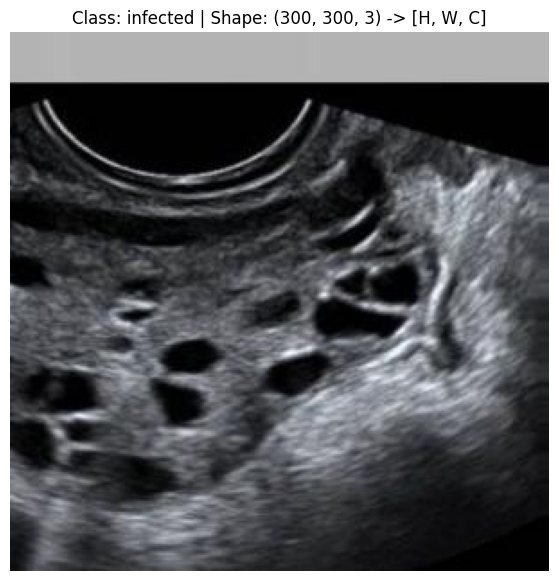

In [48]:
import numpy as np
import matplotlib.pyplot as plt

image_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(image_as_array)
plt.title(f'Class: {image_class} | Shape: {image_as_array.shape} -> [H, W, C]')
plt.axis(False)

In [49]:
from torchvision import transforms

data_transform = transforms.Compose([
  transforms.Resize(size=(64,64)),
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor()
])

In [50]:
data_transform(img).dtype

torch.float32

In [51]:
def plot_transformed_images(image_paths: list,
                            transform,
                            n = 3,
                            seed = None):
  '''
    Selects random images from a path of images and loads/transforms them. Plots the orginal vs the transformed version
  '''
  if seed:
    random.seed(seed)

  random_image_paths = random.sample(image_paths, k= n)

  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f'Original\nSize: {f.size}')
      ax[0].axis(False)

      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'Transformed\nShape: {transformed_image.shape}')
      ax[1].axis(False)

      fig.suptitle(f'Class:{image_path.parent.stem}', fontsize=16)

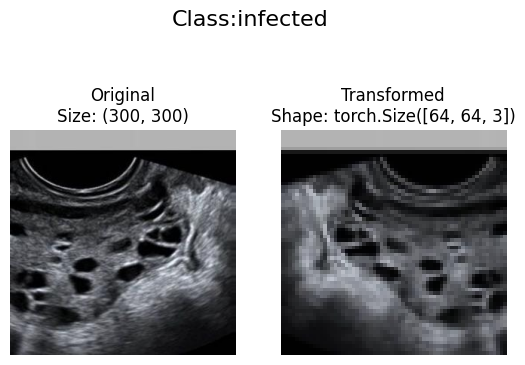

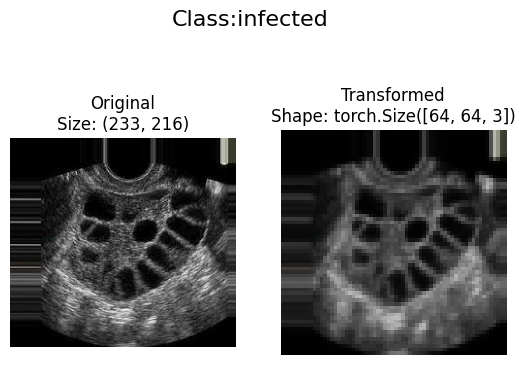

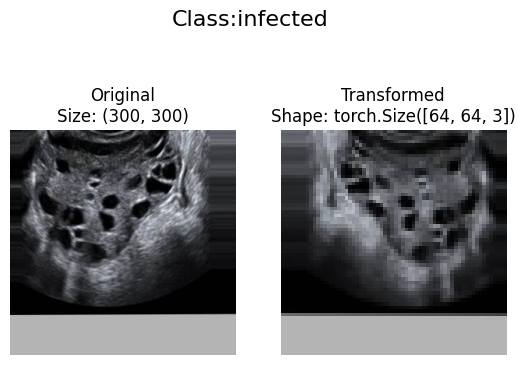

In [52]:
plot_transformed_images(image_paths = image_path_list,
                        transform = data_transform,
                        n = 3,
                        seed = 42)

In [53]:
train_dir = image_path/'train'
test_dir = image_path/'test'

train_dir, test_dir

(PosixPath('data/images/train'), PosixPath('data/images/test'))

In [54]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform = data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                  transform = data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 1924
     Root location: data/images/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 1932
     Root location: data/images/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [55]:
class_names = train_data.classes
print(class_names)

['infected', 'notinfected']


In [56]:
class_dict = train_data.class_to_idx
print(class_dict)

{'infected': 0, 'notinfected': 1}


In [57]:
len(train_data), len(test_data)

(1924, 1932)

In [58]:
train_data.samples[0]

('data/images/train/infected/img1.jpg', 0)

In [59]:
img, label = train_data[0][0], train_data[0][1]
print(f'Image Tensor: {img}\nImage Shape: {img.shape} | Image dtype: {img.dtype}\nImage Label: {label} | Label dtype: {type(label)}')

Image Tensor: tensor([[[0.4078, 0.4078, 0.4078,  ..., 0.4078, 0.4078, 0.4078],
         [0.1725, 0.1725, 0.1725,  ..., 0.1725, 0.1725, 0.1725],
         [0.1765, 0.1765, 0.1765,  ..., 0.1765, 0.1765, 0.1765],
         ...,
         [0.1373, 0.1373, 0.1373,  ..., 0.1373, 0.1373, 0.1373],
         [0.1373, 0.1373, 0.1373,  ..., 0.1373, 0.1373, 0.1373],
         [0.2392, 0.2392, 0.2392,  ..., 0.2392, 0.2392, 0.2392]],

        [[0.4000, 0.4000, 0.4000,  ..., 0.4000, 0.4000, 0.4000],
         [0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
         [0.1529, 0.1529, 0.1529,  ..., 0.1529, 0.1529, 0.1529],
         ...,
         [0.1216, 0.1216, 0.1216,  ..., 0.1216, 0.1216, 0.1216],
         [0.1216, 0.1216, 0.1216,  ..., 0.1216, 0.1216, 0.1216],
         [0.2314, 0.2314, 0.2314,  ..., 0.2314, 0.2314, 0.2314]],

        [[0.4039, 0.4039, 0.4039,  ..., 0.4039, 0.4039, 0.4039],
         [0.1608, 0.1608, 0.1608,  ..., 0.1608, 0.1608, 0.1608],
         [0.1608, 0.1608, 0.1608,  ..., 0.16

Orginal Shape: torch.Size([3, 64, 64]) -> [C, H, W]
Image Permuted: torch.Size([64, 64, 3]) -> [H, W, C]


(-0.5, 63.5, 63.5, -0.5)

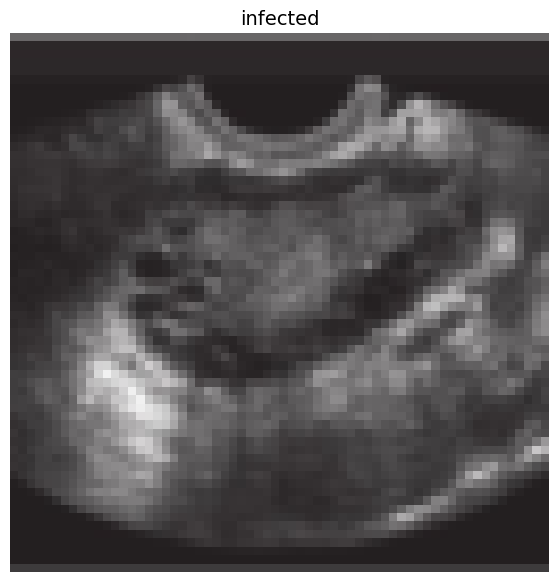

In [60]:
img_permute = img.permute(1, 2, 0)

print(f'Orginal Shape: {img.shape} -> [C, H, W]\nImage Permuted: {img_permute.shape} -> [H, W, C]')

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.title(class_names[label], fontsize=14)
plt.axis(False)

In [61]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                        batch_size = BATCH_SIZE,
                        num_workers=os.cpu_count(),
                        shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = os.cpu_count(),
                             shuffle = False)


train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a32f062e590>,
 <torch.utils.data.dataloader.DataLoader at 0x7a32f062f520>)

In [62]:
len(train_dataloader), len(test_dataloader)

(61, 61)

In [63]:
img, label = next(iter(train_dataloader))

print(f'Image Shape: {img.shape} -> [B, C, H, W]\nLabel Shape: {label.shape}')

Image Shape: torch.Size([32, 3, 64, 64]) -> [B, C, H, W]
Label Shape: torch.Size([32])


In [64]:
train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

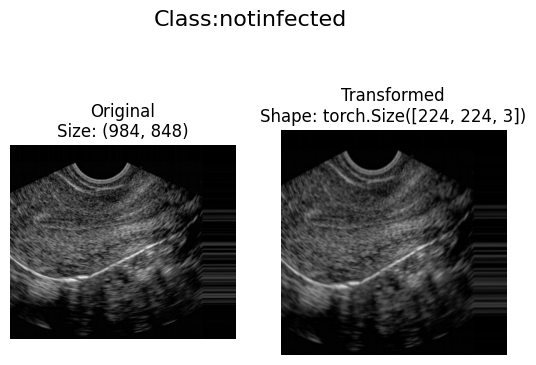

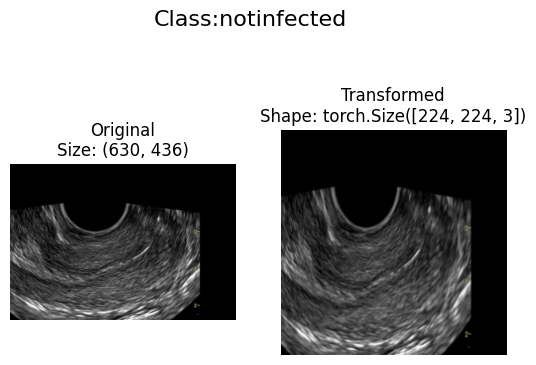

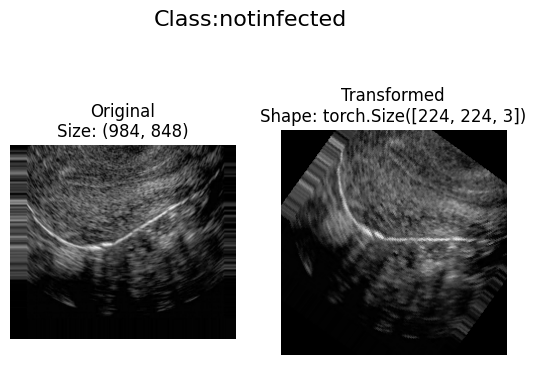

In [65]:
plot_transformed_images(
    image_paths = image_path_list,
    transform = train_transform,
    n = 3,
    seed = None
)

In [66]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [67]:
from torchvision import datasets

train_data_simple = datasets.ImageFolder(
    root = train_dir,
    transform = simple_transform
)

test_data_simple = datasets.ImageFolder(
    root = test_dir,
    transform = simple_transform
)

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(
    dataset = train_data_simple,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = NUM_WORKERS
)

test_dataloader_simple = DataLoader(
    dataset = test_data_simple,
    batch_size = BATCH_SIZE,
    shuffle = False,
    num_workers = NUM_WORKERS
)

In [68]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels= input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels= hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x = self.classifier(x)
    print(x.shape)
    return x
    #return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [70]:
torch.manual_seed(42)

model_0 = TinyVGG(
    input_shape = 3,
    hidden_units= 10,
    output_shape = len(class_names)).to(device = 'cpu')

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=2, bias=True)
  )
)